In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [2]:
gdf = gpd.read_file('Data/State/tl_2023_us_state.shp')

gdf = gdf[gdf['NAME'] == 'California']

In [20]:
deep_reload(src)

atlas, graph, cities = src.experiment.load_graphs()

In [21]:
deep_reload(src)

sg = src.experiment.tesla_network(graph)
sg = src.experiment.prepare_graph(sg)

In [22]:
deep_reload(src)

sg_c = src.experiment.combined_network(graph)
sg_c = src.experiment.prepare_graph(sg_c)

In [346]:
deep_reload(src)

seed = 125897

rng = np.random.default_rng(seed = seed)

veh = src.routing.ConstrainedVehicle(
    n_cases = 10,
    risk_attitude = (0, 1),
    capacity = 80 * 3.6e6 * .8 * 1,
    efficiency = 536.4,
    rate = 170e3 * 1,
)

station = src.routing.Station(
    veh,
    reliability = 1,
    # arrival_param = (1, .5),
    # service_param = (1, .5),
)

sg = src.experiment.add_stations(sg, station, rng)
locations = list(cities.nodes)

In [347]:
deep_reload(src)

t0 = time.time()

expectations, values, paths = veh.routes(
    sg,
    origins = ['Fresno'],
    destinations = locations,
    return_paths = True
)

time.time() - t0

1.3545222282409668

In [348]:
{k: v['time'].mean() / 3600 for k, v in values.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.6367222152847138,
 'Stockton': 2.0871465791153287,
 'San Jose': 2.7082465034965035,
 'Sacramento': 2.8204484231046734,
 'San Francisco': 3.18427343148095,
 'Los Angeles': 3.512457037809263,
 'Chico': 4.539967158766733,
 'I-80 to Reno (State Line)': 4.743937084674164,
 'San Diego': 5.47256359791584,
 'Redding': 5.599011476591078,
 'I-15 to Las Vegas (State Line)': 6.1285117122769535,
 'Yreka': 7.069267588117471,
 'I-10 to Phoenix (State Line)': 7.197430860532954,
 'Crescent City': 9.279779457707695}

In [349]:
{k: v / 3600 for k, v in expectations.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.6367222152847138,
 'Stockton': 2.0871465791153287,
 'San Jose': 2.7082465034965035,
 'Sacramento': 2.8204484231046734,
 'San Francisco': 3.18427343148095,
 'Los Angeles': 3.512457037809263,
 'Chico': 4.539967158766733,
 'I-80 to Reno (State Line)': 4.743937084674164,
 'San Diego': 5.47256359791584,
 'Redding': 5.599011476591078,
 'I-15 to Las Vegas (State Line)': 6.1285117122769535,
 'Yreka': 7.069267588117471,
 'I-10 to Phoenix (State Line)': 7.197430860532954,
 'Crescent City': 9.279779457707695}

In [350]:
{k: v for k, v in paths.items() if 'station' not in k}

{'Fresno': ['Fresno'],
 'Sacramento': ['Fresno', 'Sacramento'],
 'Stockton': ['Fresno', 'Stockton'],
 'San Francisco': ['Fresno', 'station_1130', 'San Francisco'],
 'San Jose': ['Fresno', 'San Jose'],
 'Bakersfield': ['Fresno', 'Bakersfield'],
 'Los Angeles': ['Fresno', 'station_120', 'Los Angeles'],
 'Chico': ['Fresno', 'station_1131', 'Chico'],
 'I-80 to Reno (State Line)': ['Fresno',
  'station_1131',
  'I-80 to Reno (State Line)'],
 'Redding': ['Fresno', 'station_496', 'Redding'],
 'I-15 to Las Vegas (State Line)': ['Fresno',
  'station_1808',
  'I-15 to Las Vegas (State Line)'],
 'San Diego': ['Fresno', 'station_120', 'San Diego'],
 'I-10 to Phoenix (State Line)': ['Fresno',
  'station_120',
  'Los Angeles',
  'station_1098',
  'I-10 to Phoenix (State Line)'],
 'Yreka': ['Fresno', 'station_1131', 'station_274', 'Yreka'],
 'Crescent City': ['Fresno',
  'station_184',
  'station_341',
  'station_230',
  'Crescent City']}

In [351]:
deep_reload(src)

seed = 125897

rng = np.random.default_rng(seed = seed)

veh = src.routing.ConstrainedVehicle(
    n_cases = 10,
    risk_attitude = (0, 1),
    capacity = 80 * 3.6e6 * .8 * 1,
    efficiency = 536.4,
    rate = 170e3 * 1,
)

station = src.routing.Station(
    veh,
    reliability = 1,
    # arrival_param = (1, .5),
    # service_param = (1, .5),
)

sg_c = src.experiment.add_stations(sg_c, station, rng)
locations = list(cities.nodes)

In [352]:
station.__dict__

{'vehicle': <src.routing.ConstrainedVehicle at 0x7f5000716350>,
 'seed': None,
 'rng': Generator(PCG64) at 0x7F50145FB140,
 'chargers': 1,
 'arrival_param': (1, 0.5),
 'arrival_limits': (0.1, 1.9),
 'service_param': (60, 15),
 'service_limits': (10, 110),
 'reliability': 1,
 'energy_price': 1.3888888888888888e-07,
 'functional_chargers': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'at_least_one_functional_charger': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'arrival': array([3972.76841591, 5038.65967984, 3613.77353351, 1894.73684211,
        2913.44630707, 2597.94556593, 5686.3281365 , 4491.75389638,
        5813.48595624, 7287.33314269]),
 'service': array([1258.96187416, 1168.06038848, 1826.14821794, 1058.71968605,
         916.33806735,  922.02666376,  662.62807101, 1396.11110367,
        1453.07958546,  995.40438587]),
 'delay_time': array([398.9623443 , 270.77936551, 922.8074983 , 591.57944719,
        288.20694297, 327.23286424,  77.216078

In [353]:
deep_reload(src)

t0 = time.time()

expectations_c, values_c, paths_c = veh.routes(
    sg_c,
    origins = ['Fresno'],
    destinations = locations,
    return_paths = True
)

time.time() - t0

14.812294483184814

In [354]:
{k: v['time'].mean() / 3600 for k, v in values_c.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.6367222152847138,
 'Stockton': 2.0871465791153287,
 'San Jose': 2.7082465034965035,
 'Sacramento': 2.8204484231046734,
 'San Francisco': 3.274256891781389,
 'Los Angeles': 3.5452683216391154,
 'Chico': 4.645797207302464,
 'I-80 to Reno (State Line)': 4.849767133209894,
 'San Diego': 5.578393646451568,
 'Redding': 5.704841525126808,
 'I-15 to Las Vegas (State Line)': 6.169419728080712,
 'Yreka': 7.2809276851889315,
 'I-10 to Phoenix (State Line)': 7.391416448708088,
 'Crescent City': 9.597269603314885}

In [355]:
{k: v / 3600 for k, v in expectations_c.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.6367222152847138,
 'Stockton': 2.0871465791153287,
 'San Jose': 2.7082465034965035,
 'Sacramento': 2.8204484231046734,
 'San Francisco': 3.274256891781389,
 'Los Angeles': 3.5452683216391154,
 'Chico': 4.645797207302464,
 'I-80 to Reno (State Line)': 4.849767133209894,
 'San Diego': 5.578393646451568,
 'Redding': 5.704841525126808,
 'I-15 to Las Vegas (State Line)': 6.169419728080712,
 'Yreka': 7.2809276851889315,
 'I-10 to Phoenix (State Line)': 7.391416448708088,
 'Crescent City': 9.597269603314885}

In [356]:
values_c['Crescent City'], values['Crescent City']

({'soc': array([0.26682688, 0.26682688, 0.26682688, 0.26682688, 0.26682688,
         0.26682688, 0.26682688, 0.26682688, 0.26682688, 0.26682688]),
  'time': array([34604.09304866, 34219.5441123 , 36175.62851065, 35181.94435732,
         34271.82684468, 34388.90460849, 33638.85425164, 34709.00900325,
         34496.79682113, 33815.10416122]),
  'time_nc': array([31668.071004, 31668.071004, 31668.071004, 31668.071004,
         31668.071004, 31668.071004, 31668.071004, 31668.071004,
         31668.071004, 31668.071004]),
  'distance': array([866100., 866100., 866100., 866100., 866100., 866100., 866100.,
         866100., 866100., 866100.]),
  'price': array([41.06291, 41.06291, 41.06291, 41.06291, 41.06291, 41.06291,
         41.06291, 41.06291, 41.06291, 41.06291])},
 {'soc': array([0.26682688, 0.26682688, 0.26682688, 0.26682688, 0.26682688,
         0.26682688, 0.26682688, 0.26682688, 0.26682688, 0.26682688]),
  'time': array([33407.206016  , 33407.20601576, 33407.20601576, 33407.206015

In [357]:
{k: v for k, v in paths_c.items() if 'station' not in k}

{'Fresno': ['Fresno'],
 'Sacramento': ['Fresno', 'Sacramento'],
 'Stockton': ['Fresno', 'Stockton'],
 'San Francisco': ['Fresno', 'station_413', 'San Francisco'],
 'San Jose': ['Fresno', 'San Jose'],
 'Bakersfield': ['Fresno', 'Bakersfield'],
 'Los Angeles': ['Fresno', 'station_964', 'Los Angeles'],
 'Chico': ['Fresno', 'station_1131', 'Chico'],
 'I-80 to Reno (State Line)': ['Fresno',
  'station_1131',
  'I-80 to Reno (State Line)'],
 'Redding': ['Fresno', 'station_496', 'Redding'],
 'I-15 to Las Vegas (State Line)': ['Fresno',
  'station_632',
  'I-15 to Las Vegas (State Line)'],
 'San Diego': ['Fresno', 'station_120', 'San Diego'],
 'I-10 to Phoenix (State Line)': ['Fresno',
  'station_1770',
  'station_389',
  'I-10 to Phoenix (State Line)'],
 'Yreka': ['Fresno', 'station_1131', 'station_274', 'Yreka'],
 'Crescent City': ['Fresno',
  'station_413',
  'station_1251',
  'station_230',
  'Crescent City']}

In [43]:
deep_reload(src)

t0 = time.time()

expectations, values, paths = veh.all_pairs(
    sg,
    nodes = locations,
)

time.time() - t0

 [-->           ] (4/15) 26.67%, 0.19 it/s, 26.71 s elapsed, 53.43 s remaining


KeyboardInterrupt



In [34]:
case, expectations, values, paths = pkl.load(
    open('Outputs/Exp/Model_3_0.pkl', 'rb')
)

print(case)

{k: v['time'].mean() / 3600 for k, v in values['Fresno'].items() if 'station' not in k}

[1, 0.75, (0, 0.5)]


{'Fresno': 0.0,
 'Bakersfield': 1.6367222152847143,
 'Stockton': 2.0871465791153283,
 'San Jose': 2.7082465034965044,
 'Sacramento': 2.820448423104673,
 'San Francisco': 3.184273428519193,
 'Los Angeles': 3.3221489760239757,
 'Chico': 4.539967155804974,
 'I-80 to Reno (State Line)': 4.743937081712405,
 'San Diego': 5.472563594954083,
 'Redding': 5.599011473629321,
 'I-15 to Las Vegas (State Line)': 6.128511709315192,
 'Yreka': 7.069267582193957,
 'I-10 to Phoenix (State Line)': 7.314464392607389,
 'Crescent City': 9.279779448822422}

In [65]:
case, expectations, values, paths = pkl.load(
    open('Outputs/Exp/Model_3_2.pkl', 'rb')
)

print(case)

{k: v['time'].mean() / 3600 for k, v in values['San Diego'].items() if 'station' not in k}

[1.5, 0.75, (0, 0.5)]


{'San Diego': 0.0,
 'Los Angeles': 2.0175692363192406,
 'Bakersfield': 3.8750122365281814,
 'I-10 to Phoenix (State Line)': 3.897154109498347,
 'I-15 to Las Vegas (State Line)': 4.526988058064485,
 'Fresno': 5.481733705608122,
 'Stockton': 7.391414339681569,
 'San Jose': 7.8294257137241825,
 'San Francisco': 8.259957290559118,
 'Sacramento': 8.292999092340681,
 'Chico': 9.877416803102138,
 'I-80 to Reno (State Line)': 10.357832950510282,
 'Redding': 10.927231116275895,
 'Yreka': 12.438427856942088,
 'Crescent City': 14.435565901520048}

In [64]:
case, expectations, values, paths = pkl.load(
    open('Outputs/Exp/Model_3_0.pkl', 'rb')
)

print(case)

{k: v['time'].mean() / 3600 for k, v in values['San Diego'].items() if 'station' not in k}

[1, 0.75, (0, 0.5)]


{'San Diego': 0.0,
 'Los Angeles': 2.0175692363192406,
 'Bakersfield': 3.8750122365281814,
 'I-10 to Phoenix (State Line)': 3.897154109498347,
 'I-15 to Las Vegas (State Line)': 4.526988058064485,
 'Fresno': 5.481733705608122,
 'Stockton': 7.391414339681569,
 'San Jose': 7.8294257137241825,
 'San Francisco': 8.259957290559118,
 'Sacramento': 8.292999092340681,
 'Chico': 9.877416803102138,
 'I-80 to Reno (State Line)': 10.357832950510282,
 'Redding': 10.927231116275895,
 'Yreka': 12.438427856942088,
 'Crescent City': 14.435565901520048}

In [27]:
{k: v['time'].mean() / 3600 for k, v in values['Fresno'].items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.6367222152847143,
 'Stockton': 2.0871465791153283,
 'San Jose': 2.7082465034965044,
 'Sacramento': 2.820448423104673,
 'San Francisco': 3.184273428519193,
 'Los Angeles': 3.3221489760239757,
 'Chico': 4.539967155804974,
 'I-80 to Reno (State Line)': 4.743937081712405,
 'San Diego': 5.472563594954083,
 'Redding': 5.599011473629321,
 'I-15 to Las Vegas (State Line)': 6.128511709315192,
 'Yreka': 7.069267582193957,
 'I-10 to Phoenix (State Line)': 7.314464392607389,
 'Crescent City': 9.279779448822422}

In [24]:
pkl.dump(
    [expectations, values, paths],
    open('Outputs/Model_3_Neutral_Case_Example.pkl', 'wb')
)

In [13]:
deep_reload(src)

reliability = .75

nn = 0

for node in graph._node.values():

    if 'n_dcfc' in node.keys():

        if node['n_dcfc'] > 0:
            nn += 1

        station = src.routing.Station(
            veh,
            reliability = reliability,
            chargers = node['n_dcfc'],
            rate = 170e3,
        )

        node['update'] = station.update

In [14]:
filename = 'cities.json'

graph_cities = src.graph.graph_from_json(filename)
origin_nodes = ['Fresno']
destination_nodes = list(graph_cities.nodes)

for n in destination_nodes:
    
    graph._node[n]['min_soc'] = .5

In [15]:
deep_reload(src)

t0 = time.time()

expectations, values, paths = veh.routes(
    graph,
    origins = origin_nodes,
    destinations = destination_nodes,
    return_paths = True
)

time.time() - t0

3.9123034477233887

In [16]:
pkl.dump(
    [expectations, values, paths],
    open('Outputs/Model_3_Fresno_Neutral.pkl', 'wb')
)

In [17]:
plot_graph = src.graph.subgraph(graph, list(graph_cities.nodes))

paths_c = [v[1:-1] for k, v in paths.items() if k in graph_cities.nodes]
plot_graph_c = src.graph.subgraph(
    graph, list(np.unique(np.concatenate(paths_c)))
)

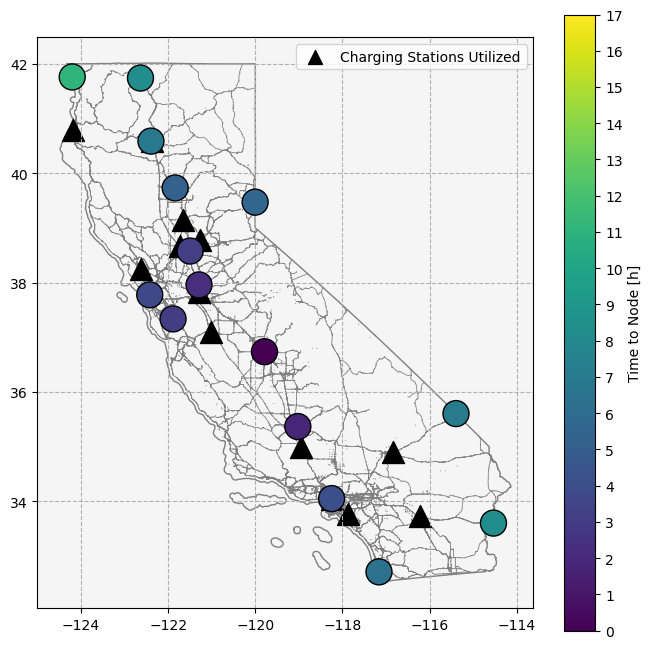

In [19]:
deep_reload(src)

path_values_avg = {}

for target, value in values.items():

    path_values_avg[target] = {}

    for key, val in value.items():

        path_values_avg[target][key] = src.routing.super_quantile(val, (0, 1))

fig, ax  = plt.subplots(figsize = (8,8))

key = 'time'

for source, node in plot_graph._node.items():

		try:
			node['plot'] = path_values_avg[source][key] / 3.6e3

		except:
			node['plot'] = np.nan

gdf.plot(ax = ax, ec = 'gray', fc = 'none')

kwargs = {
    'show_links': False,
    'node_field': 'plot',
    'scatter': {
        's': 350,
        'ec': 'k',
        'zorder': 2,
        'vmin': 0,
        'vmax': 17,
    },
    'colorbar': {
        'label': 'Time to Node [h]',
        'ticks': range(0, 18),
    },
    'cmap': src.figures.colormap('viridis'),
}

src.figures.plot_graph(plot_graph, ax = ax, **kwargs)

kwargs = {
		'node_field': None,
		'scatter': {
			's': .5,
			'ec': 'none',
            'fc': 'gray',
            'zorder': 0,
		},
		'show_links': False,
	}
src.figures.plot_graph(atlas, ax = ax, **kwargs)

kwargs = {
    'scatter': {
        's': 250,
        'ec': 'k',
        'fc': 'k',
        'label': 'Charging Stations Utilized',
        'zorder': 1,
        'marker': '^',
    },
    'show_links': False,
    'axes': {
        'facecolor': 'whitesmoke',
    }
}

src.figures.plot_graph(plot_graph_c, ax = ax, **kwargs)

_ = ax.grid(ls = '--')
legend = ax.legend()
legend.legendHandles[0]._sizes = [100]

# fig.savefig('Paper/figs/R_California_Bolt_Fresno_Cautious.png', bbox_inches = 'tight', dpi = 300)

In [20]:
{k: v['time'] / 3600 for k, v in path_values_avg.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.818580239205238,
 'Stockton': 2.3190517545725875,
 'San Jose': 3.0091627816627815,
 'Sacramento': 3.133831581227414,
 'San Francisco': 3.6655295590398236,
 'Los Angeles': 4.051638858616637,
 'Chico': 5.222281290408672,
 'I-80 to Reno (State Line)': 5.559935206570638,
 'San Diego': 6.348895842408807,
 'Redding': 6.858610891808932,
 'I-15 to Las Vegas (State Line)': 6.9868977210771845,
 'Yreka': 8.299300640990769,
 'I-10 to Phoenix (State Line)': 8.359985959301113,
 'Crescent City': 11.023539270554204}

In [94]:
{k: v['time_nc'] / 3600 for k, v in path_values_avg.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.818580239205238,
 'Stockton': 2.3190517545725875,
 'Sacramento': 3.125707124665461,
 'San Jose': 3.0724786324786337,
 'San Francisco': 3.4546262726471064,
 'Los Angeles': 3.69127664002664,
 'Chico': 4.886171247733754,
 'I-80 to Reno (State Line)': 5.236370862933366,
 'San Diego': 5.869172817922828,
 'Redding': 6.267103949291456,
 'I-15 to Las Vegas (State Line)': 6.598255517630515,
 'I-10 to Phoenix (State Line)': 7.56597149763817,
 'Yreka': 7.881089674214683,
 'Crescent City': 9.924029431216944}

In [28]:
{k: v['time'] / 3600 for k, v in path_values_avg.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.8185802392052384,
 'Stockton': 2.3190517545725915,
 'San Jose': 3.1718551485373503,
 'Sacramento': 3.418045700078774,
 'San Francisco': 3.8699938516401367,
 'Los Angeles': 4.454643334751668,
 'Chico': 5.653357454344395,
 'I-80 to Reno (State Line)': 6.0614637638640305,
 'San Diego': 7.09528321295362,
 'Redding': 7.115529306675718,
 'I-15 to Las Vegas (State Line)': 7.949343328246323,
 'Yreka': 9.355659174872667,
 'I-10 to Phoenix (State Line)': 9.502401945764017,
 'Crescent City': 12.720386049793047}

In [29]:
{k: v['time_nc'] / 3600 for k, v in path_values_avg.items() if 'station' not in k}

{'Fresno': 0.0,
 'Bakersfield': 1.8185802392052384,
 'Stockton': 2.3190517545725915,
 'San Jose': 3.009162781662782,
 'Sacramento': 3.1022296954588615,
 'San Francisco': 3.4114510643677307,
 'Los Angeles': 3.69127664002664,
 'Chico': 4.886171247733754,
 'I-80 to Reno (State Line)': 5.187902876444547,
 'San Diego': 5.88966898841899,
 'Redding': 5.9311873889999,
 'I-15 to Las Vegas (State Line)': 6.5748180176305215,
 'Yreka': 7.564757850174525,
 'I-10 to Phoenix (State Line)': 7.559964657256322,
 'Crescent City': 10.116834997564164}

In [196]:
# Graph containing DC chargers

with open('Data/AFDC/evse_stations.json', 'r') as file:
    evse = json.load(file)

In [197]:
stations_raw = []

for station in evse['fuel_stations']:

    checks = (
        station['state'] == 'CA',
        station['ev_dc_fast_num'] is not None,
        station['access_code'] == 'public',
        station['status_code'] == 'E',
    )

    if all(checks):

        stations_raw.append(station)

In [198]:
df_stations = pd.DataFrame.from_dict(stations_raw)

In [215]:
df_s_t = df_stations[df_stations['ev_network'] == 'Tesla']
df_s_np = df_stations[df_stations['ev_network'] != 'Tesla']
df_s_np = df_s_np[df_s_np['ev_network'] != 'RIVIAN_ADVENTURE']
df_s_cp = df_stations[df_stations['ev_network'] == 'ChargePoint Network']
df_s_ea = df_stations[df_stations['ev_network'] == 'Electrify America']
df_s_ev = df_stations[df_stations['ev_network'] == 'eVgo Network']

df_n = [df_s_t, df_s_np, df_s_cp, df_s_ea, df_s_ev]

In [217]:
[df['ev_dc_fast_num'].sum() for df in df_n]

[6277, 3667, 478, 1086, 1199]

In [219]:
[df.shape[0] for df in df_n]

[403, 1425, 475, 252, 357]

In [218]:
[df['ev_dc_fast_num'].sum() / df.shape[0] for df in df_n]

[15.575682382133994,
 2.5733333333333333,
 1.0063157894736843,
 4.309523809523809,
 3.358543417366947]

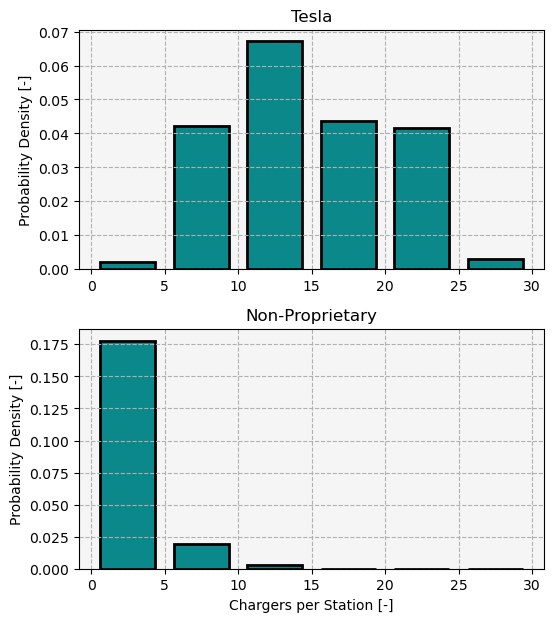

In [249]:
cp_p_s = [df['ev_dc_fast_num'] for df in df_n][:2]

bins = np.arange(0, 35, 5)

kwargs = {
    'rwidth': .75,
    'density': True,
    'bins': bins,
    'fc': 'xkcd:dark cyan',
    'ec': 'k',
    'lw': 2,
}

fig, ax = plt.subplots(2, 1, figsize = (6, 7), gridspec_kw = {'hspace': .25})

ax[0].hist(cp_p_s[0], **kwargs)

ax[0].set(**{
    'facecolor': 'whitesmoke',
    'title': 'Tesla',
    # 'xlabel': 'Chargers per Station [-]',
    'ylabel': 'Probability Density [-]',
})
ax[0].grid(**{'ls': '--'})

ax[1].hist(cp_p_s[1], **kwargs)

ax[1].set(**{
    'facecolor': 'whitesmoke',
    'title': 'Non-Proprietary',
    'xlabel': 'Chargers per Station [-]',
    'ylabel': 'Probability Density [-]',
})
ax[1].grid(**{'ls': '--'})

fig.savefig('Paper/figs/California_Charger_Network_Histograms.png', bbox_inches = 'tight', dpi = 300)

In [216]:
df_s_t.keys()

Index(['access_code', 'access_days_time', 'access_detail_code',
       'cards_accepted', 'date_last_confirmed', 'expected_date',
       'fuel_type_code', 'groups_with_access_code', 'id', 'open_date',
       'owner_type_code', 'status_code', 'restricted_access',
       'maximum_vehicle_class', 'station_name', 'station_phone', 'updated_at',
       'facility_type', 'geocode_status', 'latitude', 'longitude', 'city',
       'intersection_directions', 'plus4', 'state', 'street_address', 'zip',
       'country', 'bd_blends', 'cng_dispenser_num', 'cng_fill_type_code',
       'cng_psi', 'cng_renewable_source', 'cng_total_compression',
       'cng_total_storage', 'cng_vehicle_class', 'cng_has_rng',
       'e85_blender_pump', 'e85_other_ethanol_blends', 'ev_connector_types',
       'ev_dc_fast_num', 'ev_level1_evse_num', 'ev_level2_evse_num',
       'ev_network', 'ev_network_web', 'ev_other_evse', 'ev_pricing',
       'ev_renewable_source', 'ev_workplace_charging', 'hy_is_retail',
       'hy_pres

In [209]:
u, uc = np.unique(df_stations['ev_network'], return_counts = True)

u, uc, uc.sum(), uc.sum() - 403 - 78

(array(['7CHARGE', 'Blink Network', 'CHARGELAB', 'CIRCLE_K',
        'ChargePoint Network', 'EV Connect', 'EVCS', 'EVGATEWAY',
        'EVRANGE', 'Electrify America', 'FLO', 'LOOP', 'Non-Networked',
        'POWERFLEX', 'RIVIAN_ADVENTURE', 'SHELL_RECHARGE', 'SWTCH',
        'Tesla', 'Volta', 'eVgo Network'], dtype=object),
 array([  5,  11,   2,   7, 475,  36,  63,  14,   4, 252,   1,   1, 131,
         11,  78,  37,   1, 403,  17, 357]),
 1906,
 1425)

In [200]:
node_attributes = {
    'x': 'lambda n: n["longitude"]',
    'y': 'lambda n: n["latitude"]',
    'n_dcfc': 'lambda n: n["ev_dc_fast_num"]',
    'n_acl2': 'lambda n: n["ev_level2_evse_num"]',
    'network': 'lambda n: n["ev_network"]',
    'name': 'lambda n: n["station_name"]',
    'address': 'lambda n: n["street_address"]',
    'city': 'lambda n: n["city"]',
    'state': 'lambda n: n["state"]',
    'zip': 'lambda n: n["zip"]',
    'access_code': 'lambda n: n["access_code"]',
    'status_code': 'lambda n: n["status_code"]',
    'type': 'lambda n: "station"',
}

nlg = src.graph.nlg_from_dataframe(df_stations, node_attributes)

graph_station = src.graph.graph_from_nlg(nlg)

mapping = {n: f'station_{n}' for n in graph_station.nodes}

graph_station = nx.relabel_nodes(graph_station, mapping)

In [203]:
tesla = [k for k, v in graph_station._node.items() if v['network'] in ['Tesla', 'RIVIAN_ADVENTURE']]

npr = (
    [k for k, v in graph_station._node.items() if v['network'] not in \
     ['Tesla', 'RIVIAN_ADVENTURE']]
)

graph_station_t = src.graph.subgraph(graph_station, tesla)

graph_station_npr = src.graph.subgraph(graph_station, npr)

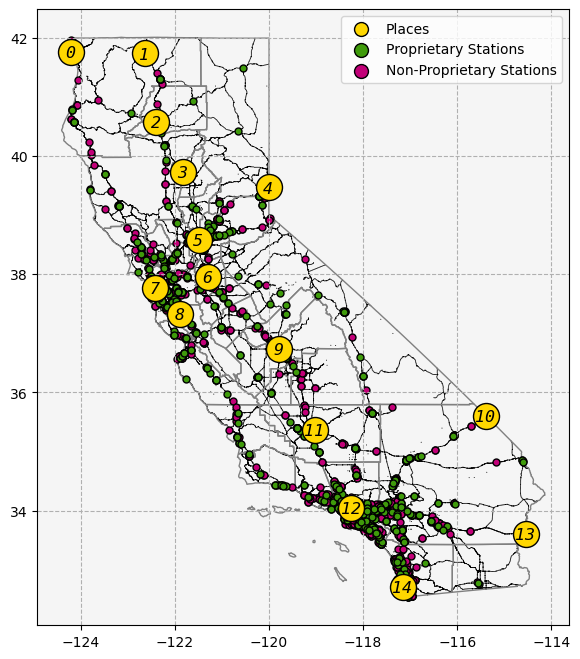

In [205]:
deep_reload(src)

fig, ax = plt.subplots(1, 1, figsize = (8, 8), squeeze = False)

kwargs = {
		# 'node_field': 'type_num',
		'scatter': {
			's': 350,
			'ec': 'k',
            'fc': 'gold',
            'label': 'Places',
            'zorder': 3,
		},
		'show_links': False,
	}

gdf_zones_california.plot(ax = ax[0, 0], ec = 'gray', fc = 'none')
src.figures.plot_graph(graph_cities, ax = ax[0, 0], **kwargs)
ax[0, 0].legend()
ax[0, 0].grid(ls = '--')

kwargs = {
		'node_field': None,
		'scatter': {
			's': .5,
			'ec': 'none',
            'fc': 'k',
            # 'label': 'Roads',
            'zorder': 0,
		},
		'show_links': False,
	}

# gdf_zones_california.plot(ax = ax[1], ec = 'gray', fc = 'none')
src.figures.plot_graph(atlas, ax = ax[0, 0], **kwargs)
ax[0, 0].legend(markerscale = 10)
ax[0, 0].grid(ls = '--')

kwargs = {
		# 'node_field': 'type_num',
		'scatter': {
			's': 25,
			'ec': 'k',
            'fc': 'xkcd:grass green',
            'label': 'Proprietary Stations',
            'zorder': 2,
		},
		'show_links': False,
        'axes': {
            'facecolor': 'whitesmoke',
        }
	}

src.figures.plot_graph(graph_station_t, ax = ax[0, 0], **kwargs)

kwargs = {
		# 'node_field': 'type_num',
		'scatter': {
			's': 25,
			'ec': 'k',
            'fc': 'xkcd:magenta',
            'label': 'Non-Proprietary Stations',
            'zorder': 1,
		},
		'show_links': False,
        'axes': {
            'facecolor': 'whitesmoke',
        }
	}

src.figures.plot_graph(graph_station_npr, ax = ax[0, 0], **kwargs)


legend = ax[0, 0].legend()
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]
ax[0, 0].grid(ls = '--')

idx = 0

for k, v in graph_cities._node.items():

    ax[0, 0].text(
        v['x'] - .015, v['y'] - .015, idx,
        horizontalalignment = 'center', verticalalignment = 'center',
        fontfamily = 'monospace', fontsize = 'large', fontstyle = 'italic',
    )

    idx += 1

fig.savefig('Paper/figs/California_Places_Chargers.png', bbox_inches = 'tight', dpi = 300)